In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Printing a few images

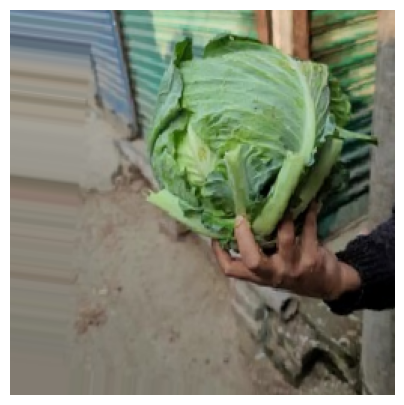

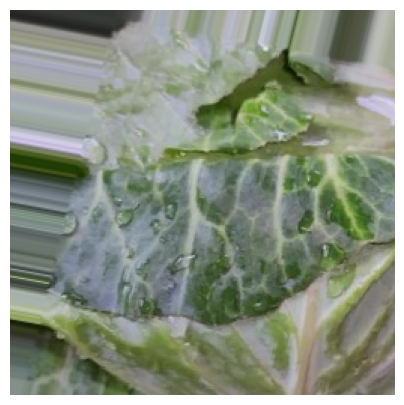

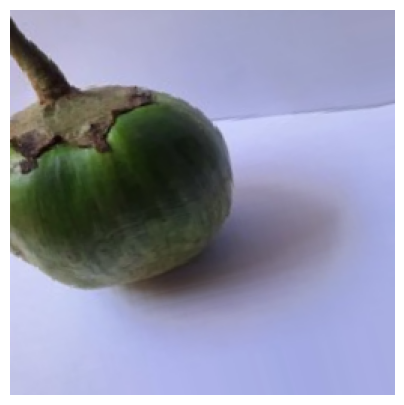

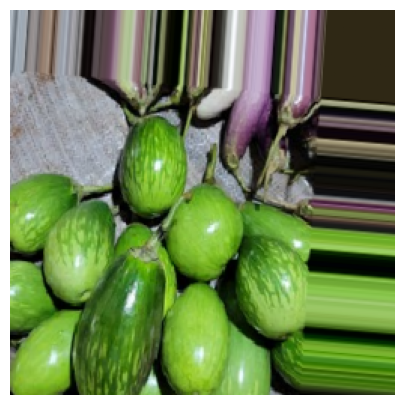

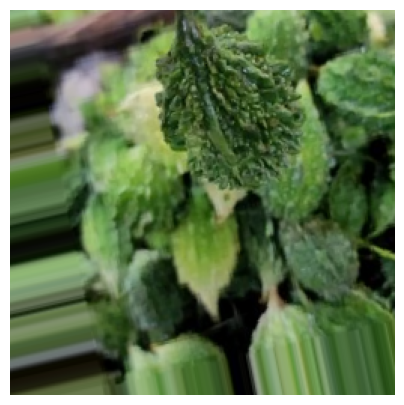

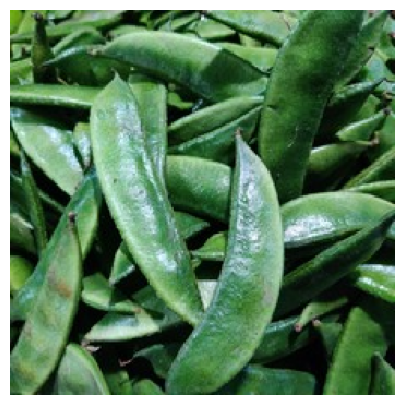

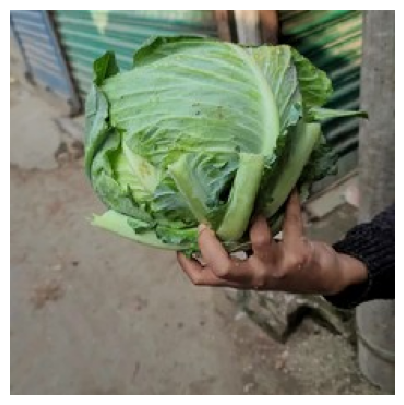

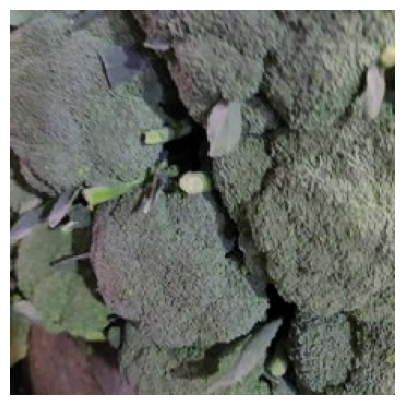

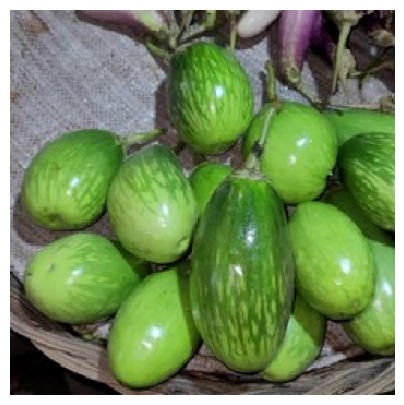

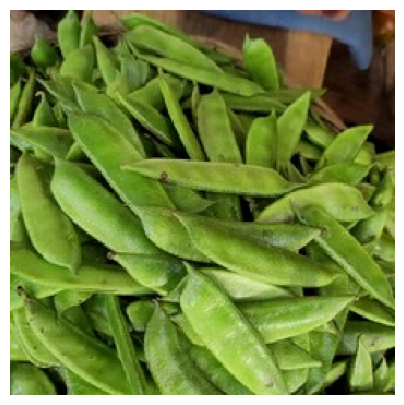

In [ ]:
import matplotlib.pyplot as plt

# Print a few sample images from the training generator
num_images_to_print = 5  # Number of images to display

# Retrieve a batch of images and labels from the train generator
for i in range(num_images_to_print):
    batch = train_generator.next()  # Get the next batch of images and labels
    image = batch[0][i]  # Get the i-th image from the batch
    label = batch[1][i]  # Get the corresponding label (0 or 1)

    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

#  print sample images from the validation generator
for i in range(num_images_to_print):
    batch = val_generator.next()  # Get the next batch of images and labels
    image = batch[0][i]  # Get the i-th image from the batch
    label = batch[1][i]  # Get the corresponding label (0 or 1)



    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.axis('off')
    plt.show()


**Binary Classification**

Preprocessing

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to train, validation, and test directories
train_dir = '/content/drive/MyDrive/Vegetables/Train'
val_dir = '/content/drive/MyDrive/Vegetables/Validation'
test_dir = '/content/drive/MyDrive/Vegetables/Test'
num_classes = 2

# Specify classes for binary classification
classes_for_binary = ['Bean', 'Brinjal']

# Image preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generate batches of augmented data from the directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary')  # Use 'binary' for binary classification

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary')  # Use 'binary' for binary classification

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    shuffle=False)  # Ensure no shuffling for test set evaluation



Found 5010 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.


Building Model

In [ ]:
# Example model building (using a simple CNN)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define a simple CNN model for binary classification
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer with 'sigmoid' activation for binary classification
])

Compiling Model

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Training Model

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=val_generator,
    validation_steps=len(val_generator))


Epoch 1/5
157/157 [==============================] - ETA: 0s - loss: -3747863552.0000 - accuracy: 0.2016

KeyboardInterrupt: 

Evaluating Model

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print(f'Test Accuracy: {test_acc}')


32/32 [==============================] - 49s 2s/step - loss: -30955048960.0000 - accuracy: 0.2000
Test Accuracy: 0.20000000298023224


**Multi Classification Model**

Preprocessing

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to train, validation, and test directories
train = '/content/drive/MyDrive/Vegetables/Train'
val = '/content/drive/MyDrive/Vegetables/Validation'
test = '/content/drive/MyDrive/Vegetables/Test'
num_classes = 5

# Image preprocessing and augmentation
train_data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_data = ImageDataGenerator(rescale=1./255)
test_data = ImageDataGenerator(rescale=1./255)

# Generate batches of augmented data from the directories
train_generator = train_data.flow_from_directory(
    train,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical')

val_generator = val_data.flow_from_directory(
    val,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical')

test_generator = test_data.flow_from_directory(
    test,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)  # Ensure no shuffling for test set evaluation


Found 5010 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.


Building Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define a CNN model for multi-class classification
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  # Output layer with softmax activation for multi-class
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Training Model

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator))


Epoch 1/10
157/157 [==============================] - ETA: 0s - loss: 1.2800 - accuracy: 0.4888 

KeyboardInterrupt: 

Evaluating Model

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print(f'Test Accuracy: {test_acc}')


32/32 [==============================] - 363s 12s/step - loss: 0.8353 - accuracy: 0.6470
Test Accuracy: 0.6470000147819519
